## Market Price vs. HydroInflow

In [1]:
from get_cleaned_data import get_market_prices_cleaned
df_price = get_market_prices_cleaned()

In [2]:
from get_cleaned_data import get_hydro_inflow_cleaned
df_inflow = get_hydro_inflow_cleaned()

In [3]:
df_price.head()

,DateTime,DeliveryStartDate,Price,Region
0,2021-04-30,2021-05-01,218.37,SE/CW
1,2021-04-30,2021-06-01,322.73,SE/CW
2,2021-04-30,2021-07-01,409.43,SE/CW
3,2021-04-30,2021-08-01,411.49,SE/CW
4,2021-04-30,2021-09-01,411.49,SE/CW


In [4]:
import pandas as pd
df_inflow_agg = df_inflow.groupby('DateTime', as_index=False)['Inflow'].sum()
df_inflow_agg['DateTime'] = pd.to_datetime(df_inflow_agg['DateTime']).dt.strftime('%Y-%m-%d')
df_inflow.head()
df_inflow_agg.head()


,DateTime,Inflow
0,2019-01-01,67077.8664
1,2019-01-02,66567.5584
2,2019-01-03,65634.4799
3,2019-01-04,65260.3494
4,2019-01-05,65074.4847


In [5]:
import plotly.express as px
import pandas as pd
# Filter for specific months in 2024 (March, June, September)
specific_months = ['2024-03-01', '2024-06-01', '2024-09-01']
df_specific_months = df_price[df_price['DeliveryStartDate'].isin(specific_months)]

# Plot for the selected delivery months
fig = px.line(df_specific_months, 
              x='DateTime', 
              y='Price', 
              color='DeliveryStartDate',  # Color by DeliveryStartDate
              title='Price Predictions for March, June, and September 2024',
              labels={'Price': 'Price (BRL/MWh)', 'DateTime': 'Logged Date'}
             )

# Add a range slider
fig.update_xaxes(rangeslider_visible=True)

# Show the plot
fig.show()

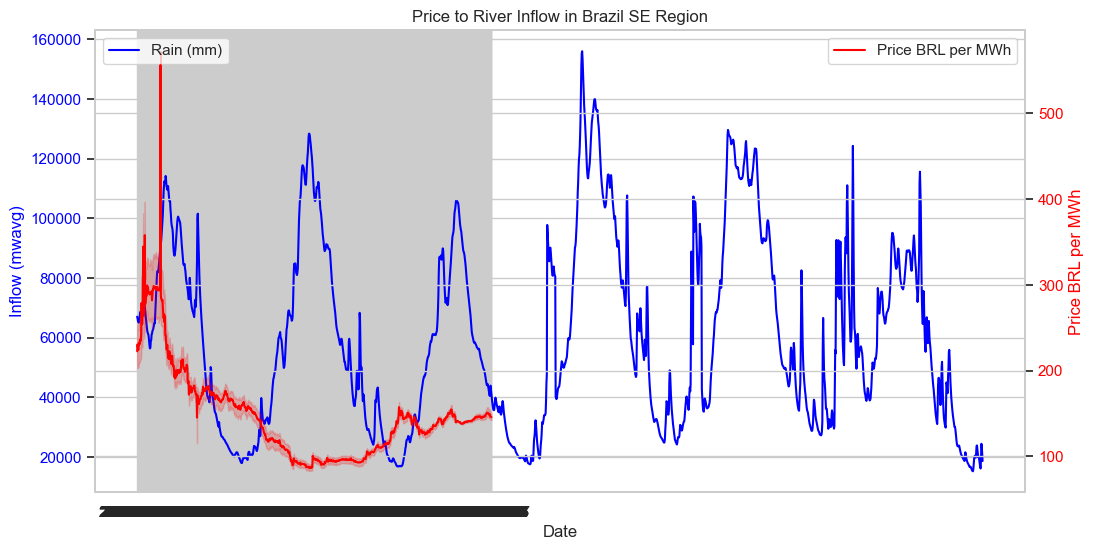

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

fig, ax1 = plt.subplots(figsize=(12, 6))  # Creating a figure and axis
# Plotting the first line on the primary y-axis
sns.lineplot(data=df_inflow_agg[['Inflow', 'DateTime']].dropna(), x='DateTime', y='Inflow', color='blue', ax=ax1, label='Rain (mm)')
ax1.set_ylabel('Inflow (mwavg)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis
ax2 = ax1.twinx()

# Plotting the second line on the secondary y-axis
sns.lineplot(data=df_price[['Price', 'DateTime']].dropna(), x='DateTime', y='Price', color='red', ax=ax2, label='Price BRL per MWh')
ax2.set_ylabel('Price BRL per MWh', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding labels and title
ax1.set_xlabel('Date')
plt.title('Price to River Inflow in Brazil SE Region')

# Optionally, you can add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [7]:
from get_cleaned_data import get_settlement_price_data_cleaned

settlement_df = get_settlement_price_data_cleaned()
settlement_df.head()

,DateTime,average_settlement_price,variance_in_settlement_price,std_settlement_price,min_settlement_price,max_settlement_price,settlement_price_range,median_settlement_price,first_settlement_price,last_settlement_price,count_price,skewness_settlement_price
0,2021-11-03 12:00:00,98.51,NaN,NaN,98.51,98.51,0.0,98.51,98.51,98.51,1,NaN
1,2021-11-03 13:00:00,99.50,NaN,NaN,99.50,99.50,0.0,99.50,99.50,99.50,1,NaN
2,2021-11-03 14:00:00,100.07,NaN,NaN,100.07,100.07,0.0,100.07,100.07,100.07,1,NaN
3,2021-11-03 15:00:00,100.05,NaN,NaN,100.05,100.05,0.0,100.05,100.05,100.05,1,NaN
4,2021-11-03 16:00:00,99.91,NaN,NaN,99.91,99.91,0.0,99.91,99.91,99.91,1,NaN


In [8]:
import datetime
date_filter = datetime.datetime(2024,8,1)
# Filter in the original DataFrame
df_inflow_agg['DateTime'] = pd.to_datetime(df_inflow_agg['DateTime'])
df_price['DeliveryStartDate'] = pd.to_datetime(df_price['DeliveryStartDate'] )
df_inflow_2023 = df_inflow_agg
df_price_2023 = df_price[df_price['DeliveryStartDate'] == date_filter]
df_price_2023['DateTime'] = pd.to_datetime(df_price_2023['DateTime'])
df_price_2023.head()

C:\Users\veron\AppData\Local\Temp\ipykernel_21240\1676396950.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DateTime,DeliveryStartDate,Price,Region
39,2021-04-30,2024-08-01,160.0,SE/CW
84,2021-05-04,2024-08-01,166.5,SE/CW
129,2021-05-05,2024-08-01,166.0,SE/CW
174,2021-05-06,2024-08-01,166.0,SE/CW
219,2021-05-07,2024-08-01,166.0,SE/CW


In [10]:
from get_cleaned_data import get_settlement_price_data_cleaned
 
df_settlement_price = get_settlement_price_data_cleaned()
 
 # Filter for the 'SE/CW' region
df_filtered = df_settlement_price
 
# # Extract the date (without time) from the 'Timestamp' column
 
df_filtered['Date'] = df_filtered['Timestamp'].dt.date
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
 
 # Group by the date and calculate the average price for each day
df_average_sp = df_filtered.groupby('Date')['PriceMWh'].mean().reset_index()
 
# # Rename columns for clarity
df_average_sp.rename(columns={'PriceMWh': 'Average Settlement Price'}, inplace=True)
df_average_sp.head()

KeyError: 'Timestamp'

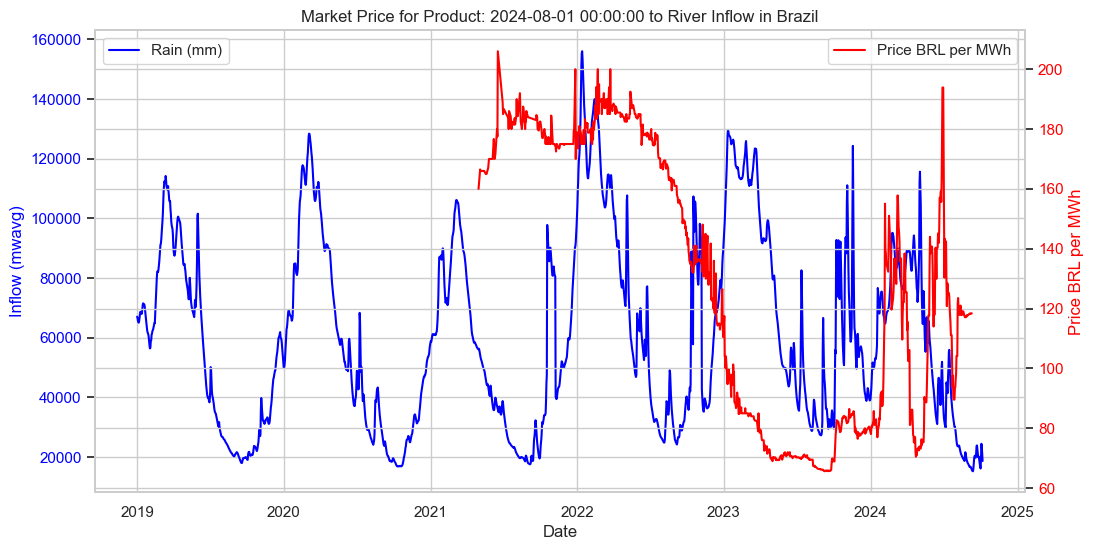

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

fig, ax1 = plt.subplots(figsize=(12, 6))  # Creating a figure and axis
# Plotting the first line on the primary y-axis
sns.lineplot(data=df_inflow_2023[['Inflow', 'DateTime']].dropna(), x='DateTime', y='Inflow', color='blue', ax=ax1, label='Rain (mm)')
ax1.set_ylabel('Inflow (mwavg)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis
ax2 = ax1.twinx()

# Plotting the second line on the secondary y-axis
sns.lineplot(data=df_price_2023[['Price', 'DateTime']].dropna(), x='DateTime', y='Price', color='red', ax=ax2, label='Price BRL per MWh')
ax2.set_ylabel('Price BRL per MWh', color='red')
ax2.tick_params(axis='y', labelcolor='red')


# Adding labels and title
ax1.set_xlabel('Date')
plt.title(f'Market Price for Product: {date_filter} to River Inflow in Brazil')

# Optionally, you can add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
# Filter in the original DataFrame
date_filter = datetime.datetime(2024,8,1)

df_inflow_agg['DateTime'] = pd.to_datetime(df_inflow_agg['DateTime'])
df_price['DeliveryStartDate'] = pd.to_datetime(df_price['DeliveryStartDate'] )
df_inflow_20234 = df_inflow_agg#[ (df_inflow_agg['DateTime'].dt.year == date_filter.year)] #(df_inflow_agg['DateTime'].dt.year == 2023) |
df_price_2023 = df_price[df_price['DeliveryStartDate'] == date_filter]
df_price_2023['DateTime'] = pd.to_datetime(df_price_2023['DateTime'])
df_price_20234 = df_price_2023#[(df_price_2023['DateTime'].dt.year == date_filter.year)] #(df_price_2023['DateTime'].dt.year == 2023) | 

df_average_sp = df_average_sp[df_average_sp['Date'].dt.year == date_filter.year]
df_average_sp.head()

C:\Users\veron\AppData\Local\Temp\ipykernel_31212\3380397657.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Average Settlement Price
789,2024-01-01,62.398333
790,2024-01-02,61.070000
791,2024-01-03,61.070000
792,2024-01-04,61.070000
793,2024-01-05,61.070000


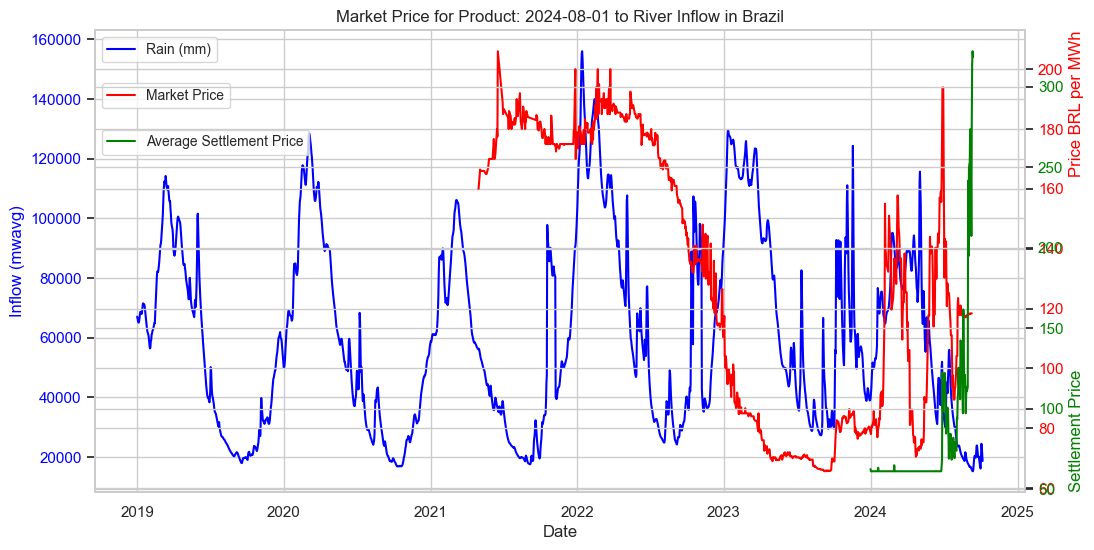

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

fig, ax1 = plt.subplots(figsize=(12, 6))  # Creating a figure and axis
# Plotting the first line on the primary y-axis
sns.lineplot(data=df_inflow_20234[['Inflow', 'DateTime']].dropna(), x='DateTime', y='Inflow', color='blue', ax=ax1, label='Rain (mm)')
ax1.set_ylabel('Inflow (mwavg)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis
ax2 = ax1.twinx()

# Plotting the second line on the secondary y-axis
sns.lineplot(data=df_price_20234[['Price', 'DateTime']].dropna(), x='DateTime', y='Price', color='red', ax=ax2, label='Market Price')
ax2.set_ylabel('Price 08-2024 BRL per MWh', color='red', loc='top')
ax2.tick_params(axis='y', labelcolor='red')


# Creating a secondary y-axis
ax3 = ax1.twinx()

# Plotting the second line on the secondary y-axis
sns.lineplot(data=df_average_sp[['Date', 'Average Settlement Price']].dropna(), x='Date', y='Average Settlement Price', color='green', ax=ax3, label='Average Settlement Price')
ax3.set_ylabel('Settlement Price', color='green', loc='bottom')
ax3.tick_params(axis='y', labelcolor='green')

# Adding labels and title
ax1.set_xlabel('Date')
plt.title(f'Market Price for Product: {date_filter.date()} to River Inflow in Brazil')

# Optionally, you can add legends
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=1, fontsize = 'small')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9), ncol=1,fontsize = 'small')
ax3.legend(loc='upper left', bbox_to_anchor=(0, 0.8), ncol=1,fontsize = 'small')

plt.show()